# Assignment 5 - AirBnB



In [117]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import math 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

filename_tsv = "data/listings.csv"

tsv_read = pd.read_csv(filename_tsv)
tsv_read.sort_values(by=['price'])





,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
20395,39956667,"Habitación individual, baño privado Barcelona....",37032072,Joan Josep,Nou Barris,el Turó de la Peira,41.43288,2.16929,Private room,0,30,0,NaN,NaN,13,343
6853,17806078,habitacion,31590542,Sabrina,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40291,2.16294,Private room,6,1,0,NaN,NaN,1,0
9364,22681178,Habitación en Gracia ( Barcelona) España,161986652,Genis,Gràcia,la Vila de Gràcia,41.40500,2.16251,Private room,8,1,3,2018-04-27,0.14,1,0
10201,24099222,Comfy Barceloneta Apartment.,181485833,Roberto,Ciutat Vella,la Barceloneta,41.38134,2.18710,Entire home/apt,8,1,0,NaN,NaN,1,0
13082,30390227,HABITACION CON ENCANTO EN BARCELONA,49196496,Marianna,Nou Barris,Porta,41.43581,2.17410,Private room,9,1,0,NaN,NaN,1,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18730,38368979,Central Boutique apartment,197915127,The Streets Apartments,Eixample,la Dreta de l'Eixample,41.39131,2.16665,Entire home/apt,9999,1,0,NaN,NaN,3,222
13323,30976440,Eixample - amazing 2BR with terrace!,155101958,The Streets Apartments,Eixample,l'Antiga Esquerra de l'Eixample,41.38618,2.15388,Entire home/apt,10000,1,0,NaN,NaN,3,261
19708,39431684,Amazing 1BR apartment in the city center,155101958,The Streets Apartments,Eixample,l'Antiga Esquerra de l'Eixample,41.38587,2.15650,Entire home/apt,10000,3,0,NaN,NaN,3,266
13324,30976458,Eixample - Amazing 2BR apartment,155101958,The Streets Apartments,Eixample,la Nova Esquerra de l'Eixample,41.38582,2.15267,Entire home/apt,10000,1,1,2019-08-25,0.39,3,268


I'll do the iteration and separate all apartments by price

In [108]:

def getPrices(df):
    
    prices = list(tsv_read.price)
    price_mean = tsv_read.price.mean()
    price_std = tsv_read.price.std()

    reallyCheap = 0
    cheap = 0
    expensive = 0
    reallyExpensive = 0
    for price in prices:
        if (price < price_mean-price_std):
            reallyCheap += 1
        elif (price < price_mean):
            cheap +=1
        elif (price > price_mean + price_std):
            reallyExpensive +=1
        elif (price > price_mean):
            expensive +=1

    print( " R cheap  " + str(reallyCheap))
    print( " cheap  " + str(cheap))
    print( " R exp  " + str(reallyExpensive))
    print( " exp  " + str(expensive))
    return reallyCheap, cheap, reallyExpensive, expensive

getPrices(tsv_read)

        

 R cheap  0
 cheap  16747
 R exp  374
 exp  3307


(0, 16747, 374, 3307)

We can se that there are 0 really cheap apartments, 16747 cheap ones, 3207 expensive and 374 really expensive. I found this results unhelping, so I removed outliers in order to obtain really cheap apartments and a better distributed results. 

In [109]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

tsv_read = remove_outlier(tsv_read, "price")
getPrices(tsv_read)

 R cheap  2095
 cheap  9140
 R exp  3037
 exp  4436


(2095, 9140, 3037, 4436)

#### Now I obtained more useful results

2) We want to know what feature defines better the price between the following features:

neighbourhood_group, neighbourhood, latitude, longitude, room_type, minimum_nights, number_of_reviews, reviews_per_month, availability_365.

Make a Decision Tree Classifier, plot the resulting decision tree and draw your conclusions.

 R cheap  2095
 cheap  9140
 R exp  3037
 exp  4436


[Text(1703.3581082789806, 2141.4545454545455, 'X[6] <= 23.5\ngini = 0.667\nsamples = 13095\nvalue = [1465, 6372, 2156, 3102]'),
 Text(1276.387912339481, 2075.5636363636363, 'X[7] <= 0.995\ngini = 0.663\nsamples = 8464\nvalue = [310, 3475, 1636, 3043]'),
 Text(874.8955939973239, 2009.6727272727273, 'X[6] <= 2.5\ngini = 0.63\nsamples = 6252\nvalue = [299, 3252, 1086, 1615]'),
 Text(413.74734038479306, 1943.7818181818184, 'X[8] <= 0.5\ngini = 0.66\nsamples = 4093\nvalue = [90, 1589, 849, 1565]'),
 Text(139.69616151956535, 1877.8909090909092, 'X[7] <= 0.2\ngini = 0.453\nsamples = 932\nvalue = [25, 668, 125, 114]'),
 Text(110.5536342821269, 1812.0, 'X[5] <= 25.0\ngini = 0.359\nsamples = 839\nvalue = [25, 662, 94, 58]'),
 Text(81.53888982105018, 1746.109090909091, 'X[7] <= 0.085\ngini = 0.3\nsamples = 726\nvalue = [24, 603, 56, 43]'),
 Text(57.39159414661368, 1680.2181818181818, 'X[7] <= 0.01\ngini = 0.266\nsamples = 678\nvalue = [22, 578, 36, 42]'),
 Text(25.79403990739554, 1614.32727272727

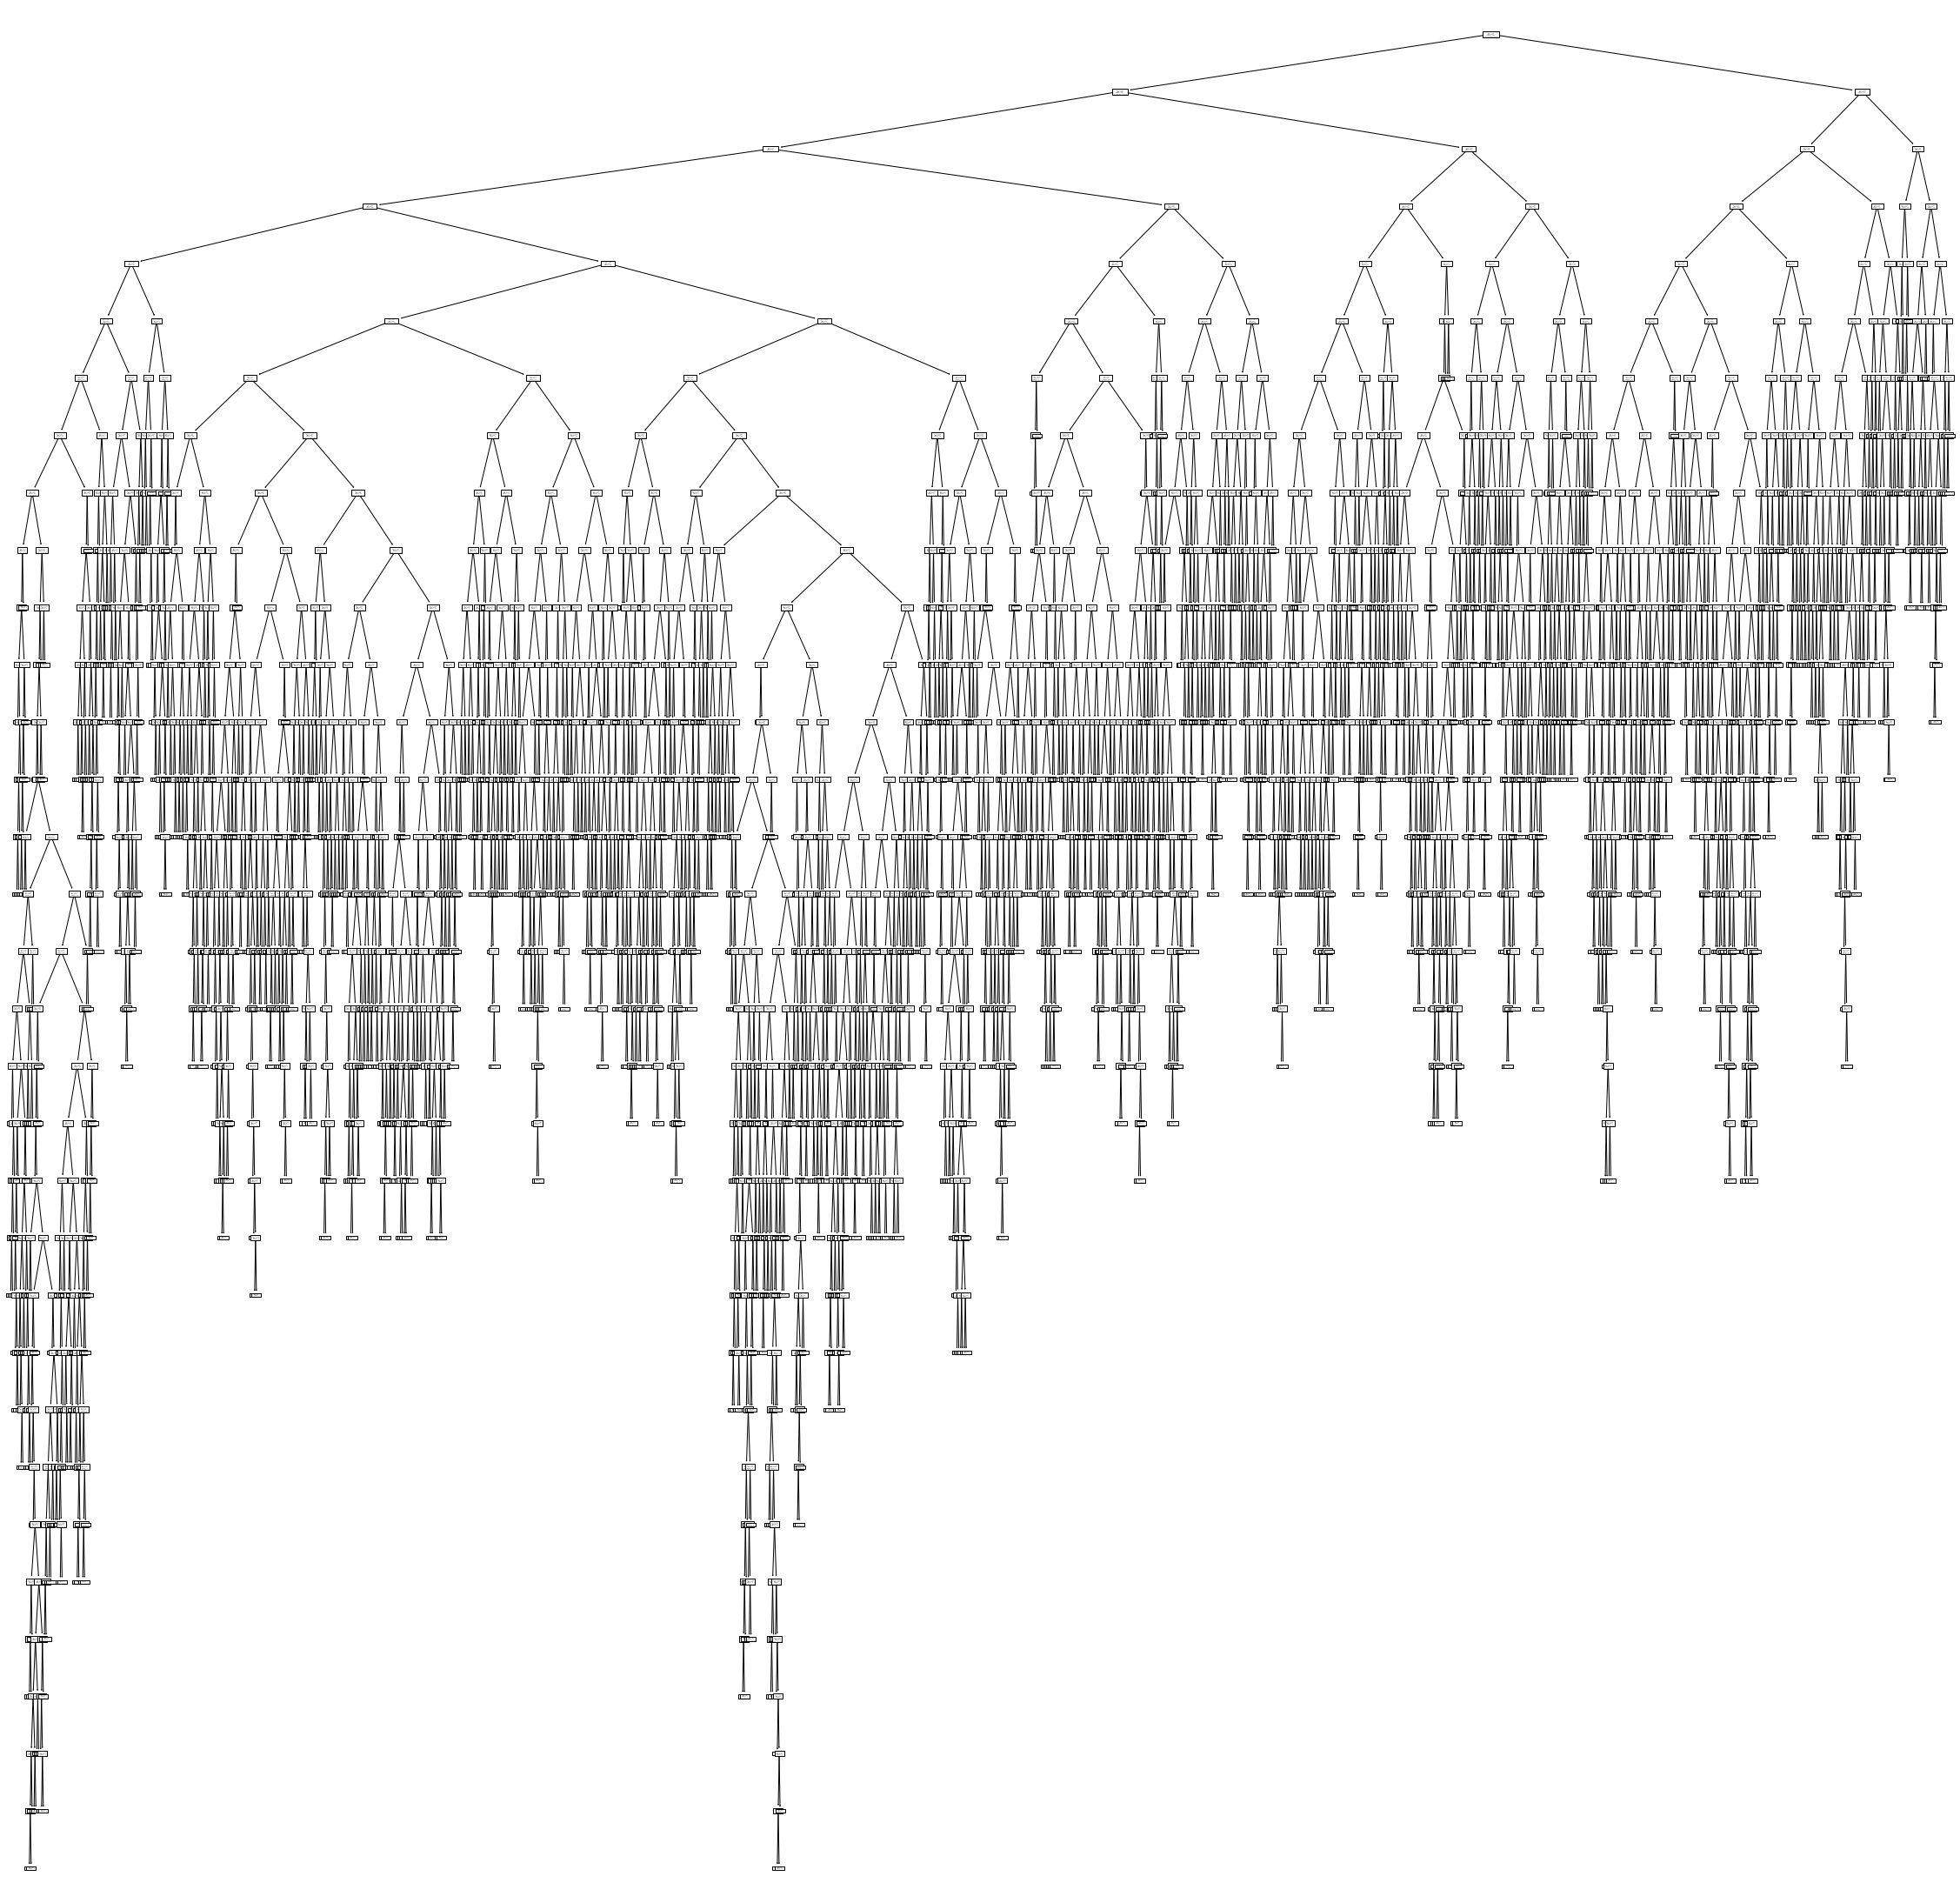

In [115]:

a,b,c,d = getPrices(tsv_read)
# Labels:
rCheap = [0] * a
cheap = [1] * b
rExp = [2] * c
exp = [3] * d

labels = list()
labels = rCheap + cheap + rExp + exp


tsv_read = tsv_read.fillna(value=0)
tsv_read.room_type = pd.Categorical(tsv_read.room_type) 
tsv_read.room_type = tsv_read.room_type.cat.codes

tsv_read.neighbourhood_group = pd.Categorical(tsv_read.neighbourhood_group) 
tsv_read.neighbourhood_group = tsv_read.neighbourhood_group.cat.codes

tsv_read.neighbourhood = pd.Categorical(tsv_read.neighbourhood) 
tsv_read.neighbourhood = tsv_read.neighbourhood.cat.codes

y = ["neighbourhood_group", "neighbourhood", "latitude", "longitude", "room_type", "minimum_nights"\
     , "number_of_reviews", "reviews_per_month", "availability_365"]
X=tsv_read[y] 

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3) # 70% training and 30% test

dt_clf = DecisionTreeClassifier()
fig=plt.figure(figsize=(40, 40))
plot_tree(dt_clf.fit(X_train,y_train))

3) Try two Random Forests Classification: one classifying the apartments with the previous categories as classes of apartments, and a second one where the numerical price is the classifier feature. Measure the out-of-bag accuracy (you will have to set the oob_score=True to be able to get within the variable ​oob_score_ ​the score otherwise is not computed). Which one works better?

In [116]:
clf = RandomForestClassifier(max_depth=2, oob_score=True)
clf.fit(X_train, y_train)
#clf.fit(x, ["neighbourhood_group", "neighbourhood", "latitude", "longitude", "room_type", "minimum_nights"\
 #    , "number_of_reviews", "reviews_per_month", "availability_365"])

print("Score with several features: "  + str(clf.oob_score_))

prices = [[x] for x in tsv_read.price]
clf.fit(prices, labels)
print("Score with price as a feature: "  + str(clf.oob_score_))



Score with several features: 0.5185185185185185
Score with price as a feature: 0.4885610434038914


I got a bad score classifying with several features, but even a worse one when I got the numerical price as the classifier feature. I think that I should obtain 1.0 from the second random forest, because I'm classifying with the price. I don't know why this is happening.